# Introduction to Scikit-learn (sklearn)

This notebook demostrate some of the most useful functions of the beautiful Scikit-learn library.

What we're going to cover:

0. An end-to-end Scikit-learn workflow
1. Getting the data ready
2. Choose the right estiator/algorithm for our problems
3. Fit the model/algorithm and use it to make preductions to our data
4. Evaluate a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 0. And end to end Scikit-learn workflow

In [1]:
# Standard import
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Getting the data ready
heart_disease = pd.read_csv('data\heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [5]:
# 2. Choose the rigth model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
X.shape, y.shape

((303, 13), (303,))

In [7]:
# 3. Fit the model to training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [9]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# 3. Fit the model/algorithm and use it to make predictions on our data
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [11]:
# 4. Evaluate the model
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.8032786885245902

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76        21
           1       0.94      0.75      0.83        40

    accuracy                           0.80        61
   macro avg       0.80      0.83      0.80        61
weighted avg       0.84      0.80      0.81        61



In [15]:
print(confusion_matrix(y_test, y_pred))

[[19  2]
 [10 30]]


In [16]:
print(accuracy_score(y_test, y_pred))

0.8032786885245902


In [17]:
# 5. Improve the model
# Try different amount of n_stimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100}')
    print('')

Trying model with 10 estimators...
Model accuracy on test set: 81.9672131147541

Trying model with 20 estimators...
Model accuracy on test set: 80.32786885245902

Trying model with 30 estimators...
Model accuracy on test set: 88.52459016393442

Trying model with 40 estimators...
Model accuracy on test set: 85.24590163934425

Trying model with 50 estimators...
Model accuracy on test set: 85.24590163934425

Trying model with 60 estimators...
Model accuracy on test set: 81.9672131147541

Trying model with 70 estimators...
Model accuracy on test set: 85.24590163934425

Trying model with 80 estimators...
Model accuracy on test set: 83.60655737704919

Trying model with 90 estimators...
Model accuracy on test set: 85.24590163934425



In [18]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model.pkl', 'wb'))

In [19]:
load_model = pickle.load(open('random_forest_model.pkl', 'rb'))
load_model.score(X_test, y_test)

0.8524590163934426

## 1. Getting the data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually 'x' & 'y')
    2. Filling (also called inputing) or disregarding values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into traingin and test test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, x_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, x_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical!

In [25]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(car_sales)

1000

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# Split into X & y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split into tranining and test sets
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')

X_tranformer = tranformer.fit_transform(X)
X_tranformer

In [ ]:
pd.DataFrame(X_tranformer)

In [ ]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_tranformer, y, test_size=0.2)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

## 1.2 Missing values?

1. Fill them with some value (also know as imputation)
2. Remove the samples with missing data altogether.

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# let's try to convert data to numbers

In [ ]:
# Create X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')

X_tranformer = tranformer.fit_transform(X)
X_tranformer

#### Option 1 : Fill missing data with pandas

In [ ]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the 'Odomether (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [ ]:
# Check out the dataframe again
car_sales_missing.isna().sum()

In [ ]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')

X_tranformer = tranformer.fit_transform(car_sales_missing)
X_tranformer

### Option 2: Fill missing values with Scikit-learn

In [30]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [33]:
# Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [34]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_inputer', num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [35]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make','Colour','Doors','Odoneter (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odoneter (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [36]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odoneter (KM)    0
dtype: int64

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                              remainder='passthrough')

X_tranformer = tranformer.fit_transform(car_sales_filled)
X_tranformer

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [38]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tranformer,
                                                   y)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21020722035944994

In [39]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Chosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning modelo or algorithm.

* Classification: Predicting whether a sample is one thing or another.
* Regression:     Predicting a number.

### 2.1 Picking a machine learning model for a regression problem

In [40]:
# Import the Boston Housing dataset.
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [41]:
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(data=boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
# How many samples?
len(boston_df)

506

In [43]:
# Try the Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge Model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on the test data
model.score(X_test, y_test)

0.6662221670168519

How we can improve this score?

What if Ridge wasn't working?

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [44]:
# Let's try random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [46]:
# Check the Ridge model
model.score(X_test, y_test)

0.6662221670168519

### 2.2 Chosse and estimator for a classification problem

Let's use the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [47]:
model = RandomForestRegressor(n_jobs=-1)

In [48]:
hear_disease = pd.read_csv('data/heart-disease.csv')
hear_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
# Check number of samples
len(hear_disease)

303

In [50]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# setup the random seeed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Linear Classifier
svc = LinearSVC()
svc.fit(X_train, y_train)

# Evaluate the Linear Classifier
svc.score(X_test, y_test)

0.8688524590163934

In [51]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [52]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup the random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
rfc.score(X_test, y_test)

0.8524590163934426

Tidbit:
    1. If you have structured data, used ensemble methods.
    2. If you have unstructure data, used deep learning or transfer learning.


## 3. Fit model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to data

In [53]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

In [54]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### 3.2 Make prediction using a machine learning model
2 ways to make preductions

 * `predict()`
 * `predict_proba()`

In [55]:
# Use a trained modelo to make predictions

clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
# Compare prediction to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [58]:
clf.score(X_test, y_test)

0.8524590163934426

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make prediction with `predict_prob()`

In [60]:
# predict_proba() returns probabilities of a classification label

clf.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [61]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can be used for regression models

In [62]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [63]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [64]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [65]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

# On averge this is the value away from the target
mean_absolute_error(y_test, y_preds)

2.136382352941176

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators
    
1. Estimator `score` method
2. The `scoring` parameter.
3. Problem-specif metric functions.

## 4.1 Evaluation the model with the score method

In [66]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [68]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [69]:
model.score(X_test, y_test)

0.8654448653350507

## 4.2 Evaluating a model using the `scoring` parameter

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# make the data sets
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate the model
crf = RandomForestClassifier()

# Fit the model
crf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

### Cross Validation

![](../images/cross-validation.jpg)

In [75]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.86666667, 0.83333333,
       0.83333333, 0.76666667, 0.86666667, 0.73333333, 0.8       ])

In [78]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [87]:
# Default scoring parameter set to None by default
clf.score

<bound method ClassifierMixin.score of RandomForestClassifier()>

In [88]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classfication model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# create data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate the model
rfc = RandomForestClassifier()

# fit the model
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [95]:
np.mean(cross_val_score)

0.8215300546448088

In [97]:
print(f'Heart Disease Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f} %')

Heart Disease Classifier Accuracy: 82.15 %


![](../images/roc-curve.jpg)

## AUC / ROC

**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under the curve (AUC)
* Receiver operating characteristic (ROC)

ROC curves are comparison of a model's true positive rate (TPR) versus a models false positive (FPR).

* True Posivites = model predicts 1 when truth is 1
* False Posivites = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negarive = model predicts 0 when truth is 1

In [100]:
# Create the X_train, ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.93, 0.07],
       [0.03, 0.97],
       [0.12, 0.88],
       [0.66, 0.34],
       [0.16, 0.84],
       [0.03, 0.97],
       [0.76, 0.24],
       [0.22, 0.78],
       [0.57, 0.43],
       [1.  , 0.  ]])

In [103]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.07, 0.97, 0.88, 0.34, 0.84, 0.97, 0.24, 0.78, 0.43, 0.  ])

In [106]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.07692308, 0.11538462, 0.11538462, 0.15384615,
       0.15384615, 0.19230769, 0.19230769, 0.23076923, 0.26923077,
       0.26923077, 0.26923077, 0.30769231, 0.30769231, 0.46153846,
       0.5       , 0.57692308, 0.65384615, 0.73076923, 0.80769231,
       0.92307692, 1.        ])

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a function for plotting the ROC Curves

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (FPR)
    and true posivite rate (TPR)
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color='red', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='blue', label='Guessing', linestyle='--')
    
    # Customize the plot
    plt.xlabel('False Positve Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

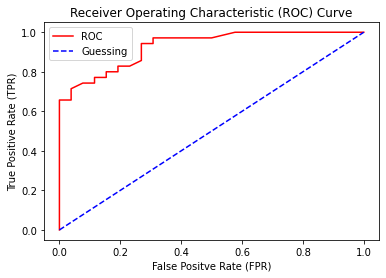

In [108]:
plot_roc_curve(fpr, tpr)

In [110]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9285714285714286

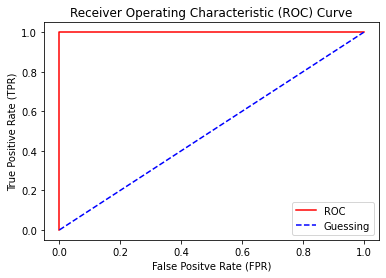

In [117]:
# A perfect ROC curve with a AUC value of 1

fpt, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpt, tpr)

In [115]:
roc_auc_score(y_test, y_test)

1.0

![](../images/ROC-AUC-remainders.jpg)